In [18]:
%matplotlib inline
import pandas_profiling as pdp
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
#matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 14 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


pd.options.display.max_columns = 999



In [19]:
def census_feature(data):
    for i in data.columns:
        #data = data.drop(["GEOID"],axis=1)
        colmun_name = i + "_density"
        #print(colmun_name)
        data[colmun_name] = data[i] / data["P0010001"]
    return data
train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'), delim_whitespace=False)
test = pd.read_csv(os.path.join(os.getcwd(),'test_set.csv'), delim_whitespace=False)
train.isnull().sum()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Id                        0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             20053
ROOMS                     0
BEDRM                     0
AYB                      56
YR_RMDL               20418
EYB                       0
STORIES               20071
SALEDATE                  1
QUALIFIED                 0
SALE_NUM                  0
GBA                   20053
BLDG_NUM                  0
STYLE                 20053
STRUCT                20053
GRADE                 20053
CNDTN                 20053
EXTWALL               20053
ROOF                  20053
INTWALL               20053
KITCHENS              20053
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             29055
LIVING_GBA            29055
FULLADDRESS           20216
CITY                  20214
STATE                 20214
ZIPCODE             

In [20]:

census = pd.read_csv(os.path.join(os.getcwd(),'raw_census_tracts_in_2010.csv'), delim_whitespace=False)
census = census.drop(["OBJECTID",
                      "GEOID",
                     ],axis=1)
census = census_feature(census)
census = census.drop(["FAGI_MEDIAN_2010_density",
                      "FAGI_MEDIAN_2011_density",
                      "FAGI_MEDIAN_2012_density",
                      "FAGI_MEDIAN_2013_density",
                      "FAGI_MEDIAN_2014_density",
                      "FAGI_MEDIAN_2015_density",
                     ],axis=1)

census = census.rename(columns={'TRACT': 'CENSUS_TRACT'})
train = pd.merge(train, census)
test = pd.merge(test, census)

In [21]:
train = train.dropna(subset=["PRICE"]) 
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49108 entries, 0 to 49107
Columns: 172 entries, Id to FAGI_TOTAL_2015_density
dtypes: float64(89), int64(59), object(24)
memory usage: 64.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49108 entries, 0 to 49107
Columns: 171 entries, Id to FAGI_TOTAL_2015_density
dtypes: float64(88), int64(59), object(24)
memory usage: 64.4+ MB


In [22]:
train = train.drop("Id",axis=1)
train = train[~train.duplicated()]

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


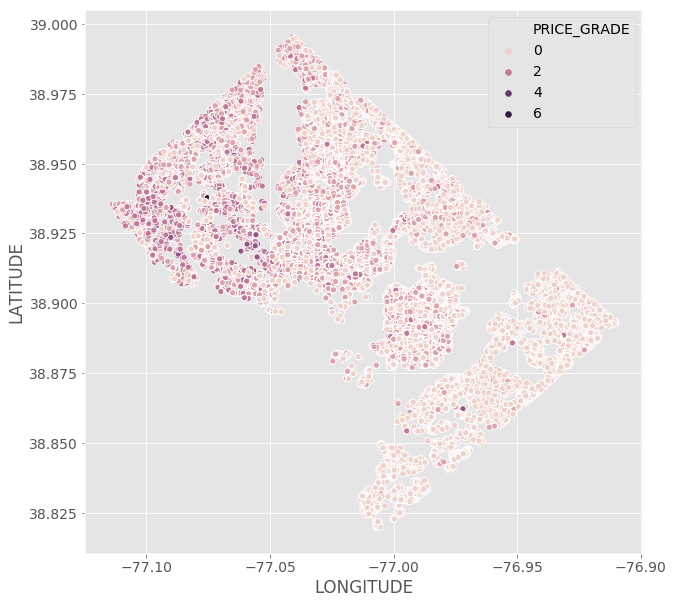

In [23]:
def func_cate(x):
    if x < 500_000:
        return 0
    elif x >= 500_000 and x < 1_000_000:
        return 1
    elif x >= 1_000_000 and x < 5_000_000:
        return 2
    elif x >= 5_000_000 and x < 40_000_000:
        return 3
    elif x >= 40_000_000 and x < 60_000_000:
        return 4
    else:
        return 5


train['PRICE_GRADE'] = train['PRICE'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=train,hue="PRICE_GRADE")

In [24]:
train[train['PRICE_GRADE'] == 5]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,OP000001,OP000002,OP000003,OP000004,P0020002,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,OP00005,OP00006,OP00007,OP00008,P0030001,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,OP00009,OP00010,OP00011,OP00012,P0040002,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,OP000013,OP000014,OP000015,OP000016,H0010001,H0010002,H0010003,ACRES,SQ_MILES,Shape_Length,Shape_Area,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015,TRACT_density,P0010001_density,P0010002_density,P0010003_density,P0010004_density,P0010005_density,P0010006_density,P0010007_density,P0010008_density,OP000001_density,OP000002_density,OP000003_density,OP000004_density,P0020002_density,P0020005_density,P0020006_density,P0020007_density,P0020008_density,P0020009_density,P0020010_density,OP00005_density,OP00006_density,OP00007_density,OP00008_density,P0030001_density,P0030003_density,P0030004_density,P0030005_density,P0030006_density,P0030007_density,P0030008_density,OP00009_density,OP00010_density,OP00011_density,OP00012_density,P0040002_density,P0040005_density,P0040006_density,P0040007_density,P0040008_density,P0040009_density,P0040010_density,OP000013_density,OP000014_density,OP000015_density,OP000016_density,H0010001_density,H0010002_density,H0010003_density,ACRES_density,SQ_MILES_density,Shape_Length_density,Shape_Area_density,FAGI_TOTAL_2010_density,FAGI_TOTAL_2013_density,FAGI_TOTAL_2011_density,FAGI_TOTAL_2012_density,FAGI_TOTAL_2014_density,FAGI_TOTAL_2015_density,PRICE_GRADE
18795,1,0,Ht Pump,Y,NaN,3,1,1989.0,2005.0,1989,NaN,2007-04-10 00:00:00,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,273,2018-07-22 18:01:38,Condominium,1658.0,702.0,NaN,NaN,NaN,20016.0,NaN,38.936070,-77.073946,Cleveland Park,NaN,1002,NaN,Ward 3,1819,-77.073948,38.936077,NW,137427545.0,3442,3329,2788,185,7,311,0,38,35,24,59,6,271,2564,178,5,311,0,9,32,24,56,5,3226,2637,165,7,297,0,33,24,22,44,6,241,2438,159,5,297,0,8,21,20,43,5,2342,2089,253,219.834053,0.343491,3952.278513,889636.856291,119559942.0,74658.0,134639759.0,76705.0,130340038.0,74072.0,142883669.4,76636.5,124109798.0,78338.0,144272959.0,79814.5,0.29111,1.0,0.96717,0.809994,0.053748,0.002034,0.090354,0.0,0.01104,0.010169,0.006973,0.017141,0.001743,0.078733,0.744916,0.051714,0.001453,0.090354,0.0,0.002615,0.009297,0.006973,0.01627,0.001453,0.937246,0.766124,0.047937,0.002034,0.086287,0.0,0.009587,0.006973,0.006392,0.012783,0.001743,0.070017,0.708309,0.046194,0.001453,0.086287,0.0,0.002324,0.006101,0.005811,0.012493,0.001453,0.680418,0.606915,0.073504,0.063868,0.0001,1.148251,258.465095,34735.601976,39116.722545,37867.529924,41511.81563,36057.466008,41915.444218,5
18799,1,0,Ht Pump,Y,NaN,3,1,1989.0,2005.0,1989,NaN,2007-04-10 00:00:00,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,258,2018-07-22 18:01:38,Condominium,1658.0,667.0,NaN,NaN,NaN,20016.0,NaN,38.936070,-77.073946,Cleveland Park,NaN,1002,NaN,Ward 3,1819,-77.073948,38.936077,NW,137427545.0,3442,3329,2788,185,7,311,0,38,35,24,59,6,271,2564,178,5,311,0,9,32,24,56,5,3226,2637,165,7,297,0,33,24,22,44,6,241,2438,159,5,297,0,8,21,20,43,5,2342,2089,253,219.834053,0.343491,3952.278513,889636.856291,119559942.0,74658.0,134639759.0,76705.0,130340038.0,74072.0,142883669.4,76636.5,124109798.0,78338.0,144272959.0,79814.5,0.29111,1.0,0.96717,0.809994,0.053748,0.002034,0.090354,0.0,0.01104,0.010169,0.006973,0.017141,0.001743,0.078733,0.744916,0.051714,0.001453,

In [25]:
center_x = train[train["PRICE_GRADE"]==5].LONGITUDE.mean()
center_y = train[train["PRICE_GRADE"]==5].LATITUDE.mean()

In [26]:
def radius(row):
    return np.sqrt((row.LONGITUDE-center_x)**2 + (row.LATITUDE-center_y)**2)

In [27]:
train['RADIUS'] = train.apply(radius, axis=1)
test['RADIUS'] = test.apply(radius, axis=1)
train = train.drop(["PRICE_GRADE"], axis=1)

In [28]:
def func_rad(x):
    if x < 0.01:
        return int(0)
    elif x >= 0.01 and x < 0.065:
        return int(1)
    else:
        return int(2)

#train['RADIUS_GRADE'] = train['RADIUS'].apply(func_rad)
#sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=train,hue="RADIUS_GRADE")


for i in train.select_dtypes(include=[object]).columns:
    sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=train,hue=i)

In [29]:
train["SALEDATE"] = train["SALEDATE"].fillna("2018-01-01")
train["SALEDATE"] = pd.to_datetime(train['SALEDATE'])
test["SALEDATE"] = pd.to_datetime(test['SALEDATE'])
#train.set_index('SALEDATE', inplace=True)
#train.groupby(train.index.year).PRICE.mean().plot()
#plt.xticks(rotation=90)

In [30]:
def date_feature(data):
    #data["day_of_week"] = data.SALEDATE.dt.dayofweek
    #data["day_in_month"] = data.SALEDATE.dt.days_in_month
    #data["day_of_year"] = data.SALEDATE.dt.dayofyear
    #data["date"] = data.SALEDATE.dt.date
    #data["ALLBATH"] = data.BATHRM + data.HF_BATHRM
    data["GBA_ROOMS"] = data.GBA / data.ROOMS
    data["LIVING_GBA_ROOMS"] = data.LIVING_GBA / data.ROOMS
    data["LANDAREA_ROOMS"] = data.LANDAREA / data.ROOMS
    data["ALLROOMS"] = data.BATHRM + data.BEDRM + data.HF_BATHRM
    
    

    #data["day"] = data.SALEDATE.dt.day
    #data["month"] = data.SALEDATE.dt.month
    #data["year"] = data.SALEDATE.dt.year
    #data["EYB-AYB"] = data.EYB-data.AYB
    #data["YR_RMDL-EYB"] = data.YR_RMDL-data.EYB
    #data["YR_RMDL-AYB"] = data.YR_RMDL-data.AYB 
    return data
date_feature(train)
date_feature(test)

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,OP000001,OP000002,OP000003,OP000004,P0020002,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,OP00005,OP00006,OP00007,OP00008,P0030001,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,OP00009,OP00010,OP00011,OP00012,P0040002,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,OP000013,OP000014,OP000015,OP000016,H0010001,H0010002,H0010003,ACRES,SQ_MILES,Shape_Length,Shape_Area,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015,TRACT_density,P0010001_density,P0010002_density,P0010003_density,P0010004_density,P0010005_density,P0010006_density,P0010007_density,P0010008_density,OP000001_density,OP000002_density,OP000003_density,OP000004_density,P0020002_density,P0020005_density,P0020006_density,P0020007_density,P0020008_density,P0020009_density,P0020010_density,OP00005_density,OP00006_density,OP00007_density,OP00008_density,P0030001_density,P0030003_density,P0030004_density,P0030005_density,P0030006_density,P0030007_density,P0030008_density,OP00009_density,OP00010_density,OP00011_density,OP00012_density,P0040002_density,P0040005_density,P0040006_density,P0040007_density,P0040008_density,P0040009_density,P0040010_density,OP000013_density,OP000014_density,OP000015_density,OP000016_density,H0010001_density,H0010002_density,H0010003_density,ACRES_density,SQ_MILES_density,Shape_Length_density,Shape_Area_density,FAGI_TOTAL_2010_density,FAGI_TOTAL_2013_density,FAGI_TOTAL_2011_density,FAGI_TOTAL_2012_density,FAGI_TOTAL_2014_density,FAGI_TOTAL_2015_density,RADIUS,GBA_ROOMS,LIVING_GBA_ROOMS,LANDAREA_ROOMS,ALLROOMS
0,49108,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW,3342,3250,2721,240,5,215,0,69,33,20,41,2,266,2544,236,3,214,0,6,28,17,38,2,3222,2638,220,5,210,0,66,30,19,36,1,251,2473,216,3,209,0,6,25,16,33,1,2259,2113,146,50.535095,0.078961,1842.645783,204508.273888,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,1.257032,1.0,0.972472,0.814183,0.071813,0.001496,0.064333,0.000000,0.020646,0.009874,0.005984,0.012268,0.000598,0.079593,0.761221,0.070616,0.000898,0.064034,0.000000,0.001795,0.008378,0.005087,0.011370,0.000598,0.964093,0.789348,0.065829,0.001496,0.062837,0.000000,0.019749,0.008977,0.005685,0.010772,0.000299,0.075105,0.739976,0.064632,0.000898,0.062537,0.000000,0.001795,0.007481,0.004788,0.009874,0.000299,0.675943,0.632256,0.043686,0.015121,0.000024,0.551360,61.193379,43227.258229,58419.860263,61236.986236,66136.618791,57642.133453,64506.021544,0.040527,315.250000,NaN,210.000000,8
1,49109,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW,3342,3250,2721,240,5,215,0,69,33,20,41,2,266,2544,236,3,214,0,6,28,17,38,2,3222,2638,220,5,210,0,66,30,19,36,1,251,2473,216,3,209,0,6,25,16,33,1,2259,2113,146,50.535095,0.078961,1842.645783,204508.273888,144465

In [31]:
def noroom(data):
    if data.ROOMS == 0:
        return 1
    else:
        return 0
train['NOROOM'] = test.apply(noroom, axis=1)
test['NOROOM'] = test.apply(noroom, axis=1)

In [32]:
train = train.replace(np.inf,np.nan)
test = test.replace(np.inf,np.nan)

In [33]:
train

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,OP000001,OP000002,OP000003,OP000004,P0020002,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,OP00005,OP00006,OP00007,OP00008,P0030001,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,OP00009,OP00010,OP00011,OP00012,P0040002,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,OP000013,OP000014,OP000015,OP000016,H0010001,H0010002,H0010003,ACRES,SQ_MILES,Shape_Length,Shape_Area,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015,TRACT_density,P0010001_density,P0010002_density,P0010003_density,P0010004_density,P0010005_density,P0010006_density,P0010007_density,P0010008_density,OP000001_density,OP000002_density,OP000003_density,OP000004_density,P0020002_density,P0020005_density,P0020006_density,P0020007_density,P0020008_density,P0020009_density,P0020010_density,OP00005_density,OP00006_density,OP00007_density,OP00008_density,P0030001_density,P0030003_density,P0030004_density,P0030005_density,P0030006_density,P0030007_density,P0030008_density,OP00009_density,OP00010_density,OP00011_density,OP00012_density,P0040002_density,P0040005_density,P0040006_density,P0040007_density,P0040008_density,P0040009_density,P0040010_density,OP000013_density,OP000014_density,OP000015_density,OP000016_density,H0010001_density,H0010002_density,H0010003_density,ACRES_density,SQ_MILES_density,Shape_Length_density,Shape_Area_density,FAGI_TOTAL_2010_density,FAGI_TOTAL_2013_density,FAGI_TOTAL_2011_density,FAGI_TOTAL_2012_density,FAGI_TOTAL_2014_density,FAGI_TOTAL_2015_density,RADIUS,GBA_ROOMS,LIVING_GBA_ROOMS,LANDAREA_ROOMS,ALLROOMS,NOROOM
0,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2100000.0,3342,3250,2721,240,5,215,0,69,33,20,41,2,266,2544,236,3,214,0,6,28,17,38,2,3222,2638,220,5,210,0,66,30,19,36,1,251,2473,216,3,209,0,6,25,16,33,1,2259,2113,146,50.535095,0.078961,1842.645783,204508.273888,144465497.0,59325.0,195239173.0,69112.0,204654008.0,64162.0,221028580.0,67390.0,192640010.0,68708.5,215579124.0,70930.5,1.257032,1.0,0.972472,0.814183,0.071813,0.001496,0.064333,0.000000,0.020646,0.009874,0.005984,0.012268,0.000598,0.079593,0.761221,0.070616,0.000898,0.064034,0.000000,0.001795,0.008378,0.005087,0.011370,0.000598,0.964093,0.789348,0.065829,0.001496,0.062837,0.000000,0.019749,0.008977,0.005685,0.010772,0.000299,0.075105,0.739976,0.064632,0.000898,0.062537,0.000000,0.001795,0.007481,0.004788,0.009874,0.000299,0.675943,0.632256,0.043686,0.015121,0.000024,0.551360,61.193379,43227.258229,58419.860263,61236.986236,66136.618791,57642.133453,64506.021544,0.040654,280.222222,NaN,186.666667,9,0
1,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,4.0,2010-02-26,Q,1,5344.0,1,4 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,1.0,4,11,2196,2018-07-22 18:01:43,Residential,NaN,NaN,1709 S STREET NW,WASHINGTON,DC,20009.0,18S UJ 23157 09248,38.914331,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1950000.0,3342,3250,2721,240,5,215,0,69,33,20,41,2,266,2544,236,3,214,0,6,28,17,38,2,3222,2638,220,5,210,0,66,30,19,36,1,251,2473,216,3,209,0,6,25,16,33,1,2259,2113,146,50.535095,0.078961,1842.64

In [34]:
train.isnull().sum()

BATHRM                         0
HF_BATHRM                      0
HEAT                           0
AC                             0
NUM_UNITS                  19907
ROOMS                          0
BEDRM                          0
AYB                           56
YR_RMDL                    20365
EYB                            0
STORIES                    19925
SALEDATE                       0
QUALIFIED                      0
SALE_NUM                       0
GBA                        19907
BLDG_NUM                       0
STYLE                      19907
STRUCT                     19907
GRADE                      19907
CNDTN                      19907
EXTWALL                    19907
ROOF                       19907
INTWALL                    19907
KITCHENS                   19907
FIREPLACES                     0
USECODE                        0
LANDAREA                       0
GIS_LAST_MOD_DTTM              0
SOURCE                         0
CMPLX_NUM                  29055
          

In [35]:
p = train.PRICE
train = train.drop(["PRICE"], axis=1)
test = test.drop([], axis=1)
print(train.columns)
train = train.join([p])
train.to_csv("train_radius.csv",index=False)
test.to_csv("test_radius.csv",index=False)

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB',
       ...
       'FAGI_TOTAL_2011_density', 'FAGI_TOTAL_2012_density',
       'FAGI_TOTAL_2014_density', 'FAGI_TOTAL_2015_density', 'RADIUS',
       'GBA_ROOMS', 'LIVING_GBA_ROOMS', 'LANDAREA_ROOMS', 'ALLROOMS',
       'NOROOM'],
      dtype='object', length=176)


In [36]:
k = 4#number of variables for heatmap
train["PRICE"] = np.log(train.PRICE)
corrmat = train.corr()
cols = corrmat.nlargest(k, 'PRICE')["PRICE"].index
train[cols].corr()

,PRICE,GBA,BATHRM,FAGI_TOTAL_2013_density
PRICE,1.000000,0.467151,0.438096,0.415511
GBA,0.467151,1.000000,0.698605,0.396191
BATHRM,0.438096,0.698605,1.000000,0.133123
FAGI_TOTAL_2013_density,0.415511,0.396191,0.133123,1.000000


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


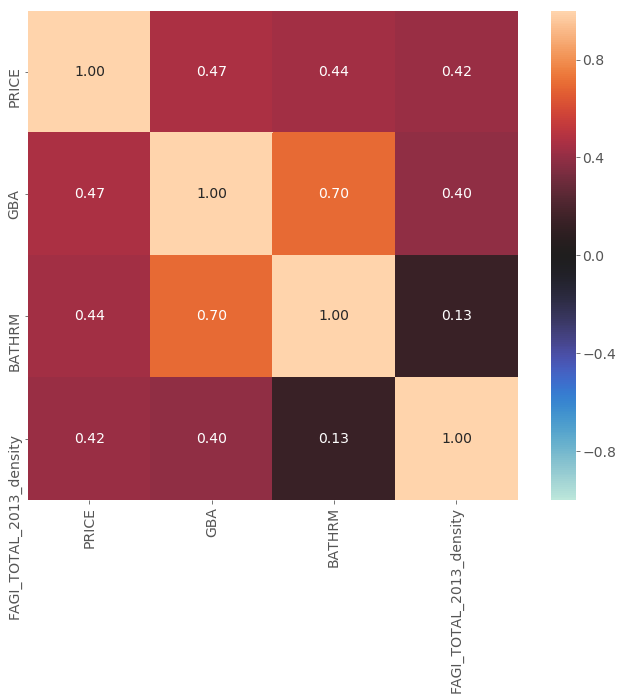

In [37]:
cm = np.corrcoef(train[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(train[cols].corr(), square=True, vmax=1, vmin=-1, center=0, annot=True, fmt='.2f')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


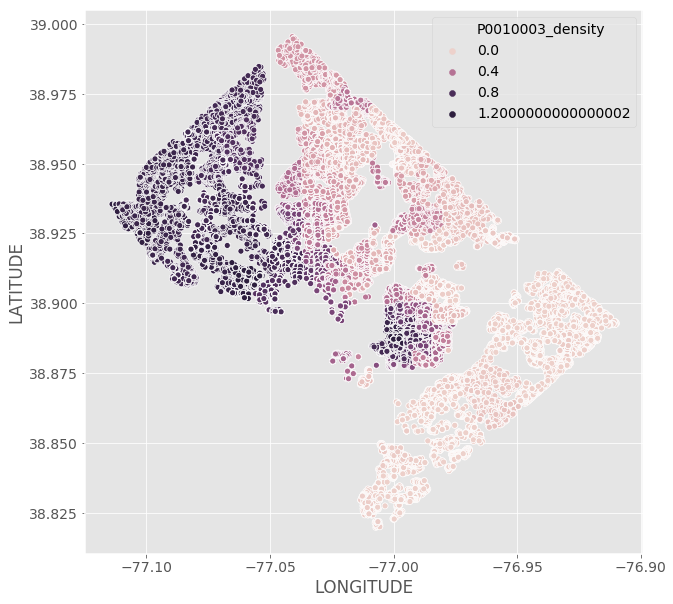

In [38]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=train,hue="P0010003_density")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


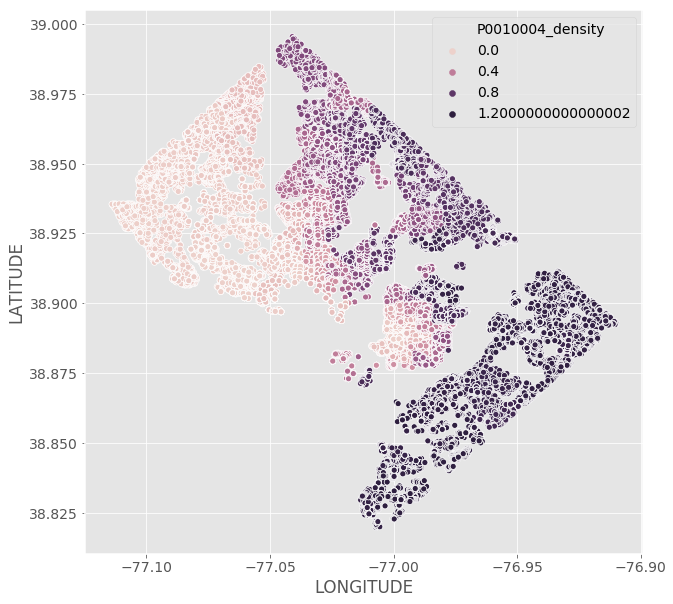

In [39]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=train,hue="P0010004_density")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


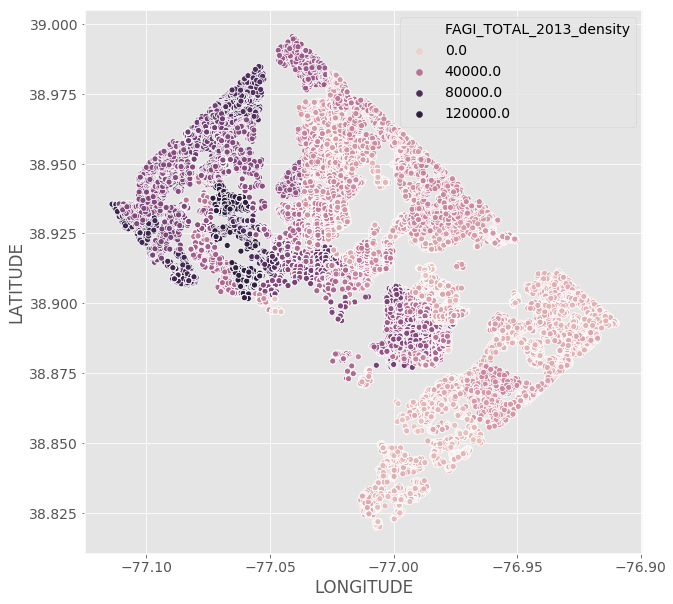

In [40]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=train,hue="FAGI_TOTAL_2013_density")

In [41]:
train.QUADRANT.dtype

dtype('O')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


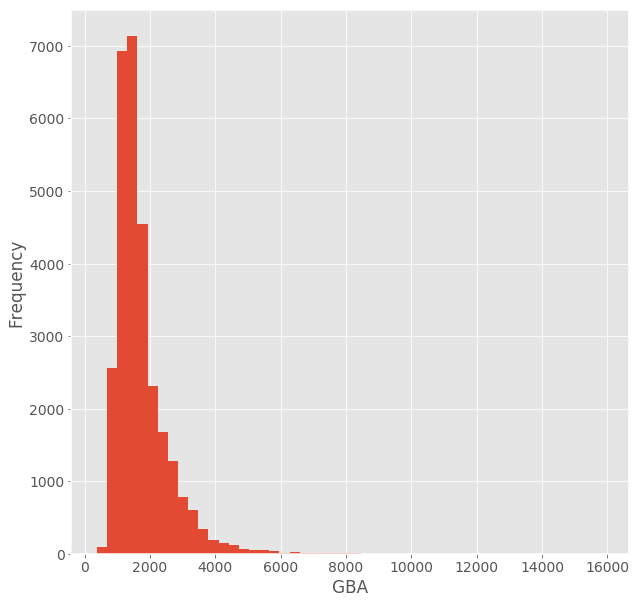

In [42]:
train.GBA.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("GBA")

In [43]:
train["LOGGBA"] = np.log(train.GBA)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


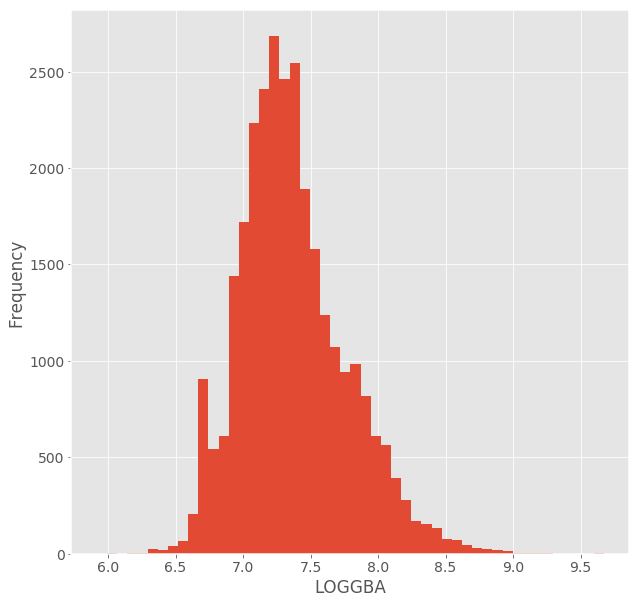

In [44]:
train.LOGGBA.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("LOGGBA")

In [45]:
train.shape

(48962, 178)

In [60]:
train = train.drop(["PRICE","Id"],axis=1)

In [3]:
test = test.drop(["Id"],axis=1)

In [178]:
train.shape

(49108, 47)

In [179]:
test.shape

(49108, 47)

In [4]:
df_all = pd.concat([train,test])

In [206]:
train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE'],
      dtype='object')

In [31]:
col = train.drop(["Id","PRICE"],axis=1).columns

In [33]:
train_dup = train[train.duplicated(subset=col)]

In [34]:
test_dup = test[test.duplicated(subset=col)]

In [35]:
df_all = pd.concat([train_dup,test_dup])

In [43]:
df_all.Id

29267    29267
29285    29285
29318    29318
29319    29319
29321    29321
29322    29322
29324    29324
29397    29397
29819    29819
29827    29827
29829    29829
29869    29869
29966    29966
29968    29968
29969    29969
29973    29973
29974    29974
30003    30003
30013    30013
30042    30042
30048    30048
30069    30069
30071    30071
30072    30072
30125    30125
30497    30497
30499    30499
30500    30500
30668    30668
31533    31533
         ...  
39535    88643
39660    88768
39669    88777
39898    89006
40324    89432
40696    89804
41639    90747
42480    91588
42503    91611
42508    91616
42509    91617
42510    91618
42511    91619
42512    91620
42514    91622
43645    92753
44267    93375
44528    93636
44634    93742
44853    93961
44988    94096
45462    94570
47389    96497
47455    96563
47741    96849
48039    97147
48794    97902
48956    98064
49005    98113
49007    98115
Name: Id, Length: 327, dtype: int64